In [ ]:
#maybe the 4 nymbers in .mat does not mean the same as in .json

#at last part , in our classification task can be improved by using better arch

#resnet is not created for detecting bounding boxes

In [ ]:
instead of sigmoid 
in 
bb_i = F.sigmoid(bb_i)*64    

maybe ""bb_i*(max-min) + min""
can work better

In [ ]:
shift + Tab >> unindent cell 

In [ ]:
#https://pjreddie.com/projects/pascal-voc-data`set-mirror/
#2007 version

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

In [3]:
#torch.cuda.set_device(3)

In [3]:
PATH = Path('D:/FAST.Ai/DL2/Data/pascal/')

In [4]:
trn_j = json.load((PATH/"PASCAL_VOC"/'pascal_train2007.json').open())
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [5]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
 {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17},
 {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23},
 {'file_name': '000026.jpg', 'height': 333, 'width': 500, 'id': 26},
 {'file_name': '000032.jpg', 'height': 281, 'width': 500, 'id': 32}]

In [6]:
trn_j[ANNOTATIONS][:2]

[{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
  'area': 34104,
  'iscrowd': 0,
  'image_id': 12,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0},
 {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]],
  'area': 13110,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0}]

In [7]:
trn_j[CATEGORIES][:4]

[{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'},
 {'supercategory': 'none', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'none', 'id': 3, 'name': 'bird'},
 {'supercategory': 'none', 'id': 4, 'name': 'boat'}]

In [8]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = {o[ID]:o['name'] for o in trn_j[CATEGORIES]}
trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [9]:
len(trn_ids)

2501

In [10]:
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])
#[rows , columns, top_left , bottom_right]

trn_anno = collections.defaultdict(lambda:[])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        #print(bb)
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        
len(trn_anno)

2501

In [11]:
trn_fns[17]# see '000017.jpg' in folder 

'000017.jpg'

In [12]:
trn_anno[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [13]:
cats[15] , cats[13]

('person', 'horse')

# changing format of bb

In [14]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

In [15]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [16]:
f'expected: {bb_voc}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], actual: [155  96 196 174]'

In [17]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME],im0_d[ID]

('000012.jpg', 12)

In [18]:
im_a = trn_anno[im0_d[ID]]; im_a

[(array([ 96, 155, 269, 350]), 7)]

In [19]:
im0_a = im_a[0]; im0_a

(array([ 96, 155, 269, 350]), 7)

In [20]:
JPEGS = 'VOCdevkit/VOC2007/JPEGImages'

In [21]:
IMG_PATH = PATH/JPEGS
list(IMG_PATH.iterdir())[:5]

[WindowsPath('D:/FAST.Ai/DL2/Data/pascal/VOCdevkit/VOC2007/JPEGImages/000005.jpg'),
 WindowsPath('D:/FAST.Ai/DL2/Data/pascal/VOCdevkit/VOC2007/JPEGImages/000007.jpg'),
 WindowsPath('D:/FAST.Ai/DL2/Data/pascal/VOCdevkit/VOC2007/JPEGImages/000009.jpg'),
 WindowsPath('D:/FAST.Ai/DL2/Data/pascal/VOCdevkit/VOC2007/JPEGImages/000012.jpg'),
 WindowsPath('D:/FAST.Ai/DL2/Data/pascal/VOCdevkit/VOC2007/JPEGImages/000016.jpg')]

In [22]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])

In [23]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [24]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

Note that `*` in argument lists is the [splat operator](https://stackoverflow.com/questions/5239856/foggy-on-asterisk-in-python). In this case it's a little shortcut compared to writing out `b[-2],b[-1]`.

In [25]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [26]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

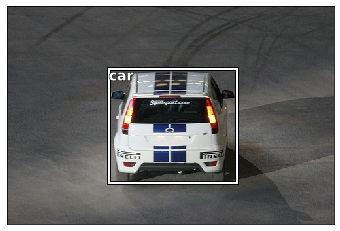

In [27]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [28]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

In [29]:
def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(IMG_PATH/trn_fns[i])
    print(im.shape)
    draw_im(im, im_a)

(364, 480, 3)


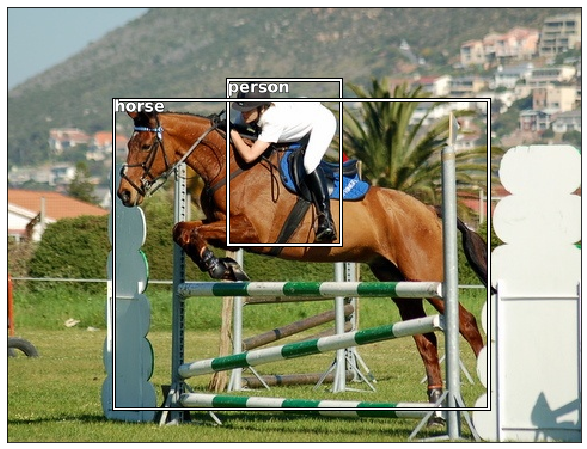

In [30]:
draw_idx(17)

## Largest item classifier

In [31]:
#trn_anno.pop(some elements)

In [32]:
def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    #print(b[0])
    return b[0]

In [33]:
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}

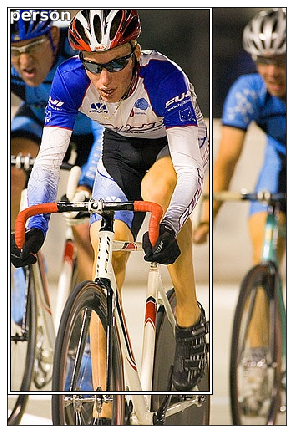

In [34]:
b,c = trn_lrg_anno[23]
b = bb_hw(b)
ax = show_img(open_image(IMG_PATH/trn_fns[23]), figsize=(5,10))
draw_rect(ax, b)
draw_text(ax, b[:2], cats[c], sz=16)

In [35]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [36]:
len(trn_ids)

2501

In [37]:
trn_ids[:3]

[12, 17, 23]

In [38]:
len(trn_lrg_anno.keys())

2501

In [40]:
list(trn_lrg_anno.keys())

[12,
 17,
 23,
 26,
 32,
 33,
 34,
 35,
 36,
 42,
 44,
 47,
 48,
 61,
 64,
 66,
 73,
 77,
 78,
 83,
 89,
 91,
 104,
 112,
 122,
 129,
 133,
 134,
 138,
 140,
 141,
 147,
 153,
 154,
 159,
 161,
 162,
 163,
 164,
 171,
 173,
 174,
 187,
 189,
 192,
 193,
 194,
 198,
 200,
 207,
 209,
 219,
 220,
 222,
 225,
 228,
 235,
 242,
 250,
 256,
 259,
 262,
 263,
 276,
 278,
 282,
 288,
 294,
 296,
 306,
 307,
 311,
 312,
 317,
 320,
 325,
 331,
 334,
 337,
 344,
 347,
 349,
 355,
 359,
 367,
 370,
 372,
 379,
 382,
 387,
 391,
 394,
 395,
 400,
 404,
 406,
 407,
 411,
 416,
 430,
 431,
 438,
 446,
 450,
 454,
 463,
 468,
 469,
 470,
 474,
 476,
 477,
 484,
 489,
 496,
 503,
 508,
 516,
 518,
 519,
 522,
 524,
 525,
 526,
 528,
 535,
 537,
 541,
 544,
 549,
 550,
 552,
 554,
 555,
 559,
 565,
 577,
 583,
 589,
 590,
 592,
 597,
 605,
 609,
 612,
 620,
 622,
 625,
 632,
 633,
 635,
 648,
 654,
 657,
 671,
 672,
 680,
 685,
 688,
 689,
 695,
 699,
 700,
 709,
 710,
 711,
 726,
 729,
 731,
 733,
 7

In [39]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_lrg_anno.keys()],
    'cat': [cats[trn_lrg_anno[o][1]] for o in trn_lrg_anno.keys()]}, columns=['fn','cat'])
    # columns is important because order is important ,  dict hasn't got order
df.to_csv(CSV, index=False)

In [40]:
f_model = resnet34
sz=64
bs=32

In [41]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms, bs=bs)

#in normal crop_type , transformer resize just the smallest side to sz (here is 64) and without
#data augentation it center crop that by (sz,sz) 
# by CropType.NO transformer resize image to (sz,sz) , just square that

In [42]:
x,y=next(iter(md.val_dl))

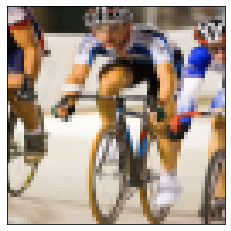

In [43]:
show_img(md.val_ds.denorm(to_np(x))[0]);

In [46]:
to_np(x)[0].shape

(3, 64, 64)

In [44]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])
learn.opt_fn = optim.Adam

In [48]:
lrf=learn.lr_find(1e-5,100)

 16%|███████████▍                                                            | 10/63 [00:21<01:31,  1.73s/it, loss=3.5]

KeyboardInterrupt: 

In [ ]:
learn.sched.plot()

In [ ]:
learn.sched.plot(n_skip=5, n_skip_end=1)

In [45]:
lr = 1e-2

In [46]:
learn.fit(lr, 1, cycle_len=1)

  2%|█▏                                                                      | 1/63 [00:05<05:38,  5.47s/it, loss=3.42]


KeyboardInterrupt: 

In [126]:
learn.save('clas_one')

In [47]:
learn.load('clas_one')

In [48]:
x,y = next(iter(md.val_dl))
probs = F.softmax(predict_batch(learn.model, x), -1)
x,preds = to_np(x),to_np(probs)
preds = np.argmax(preds, -1)

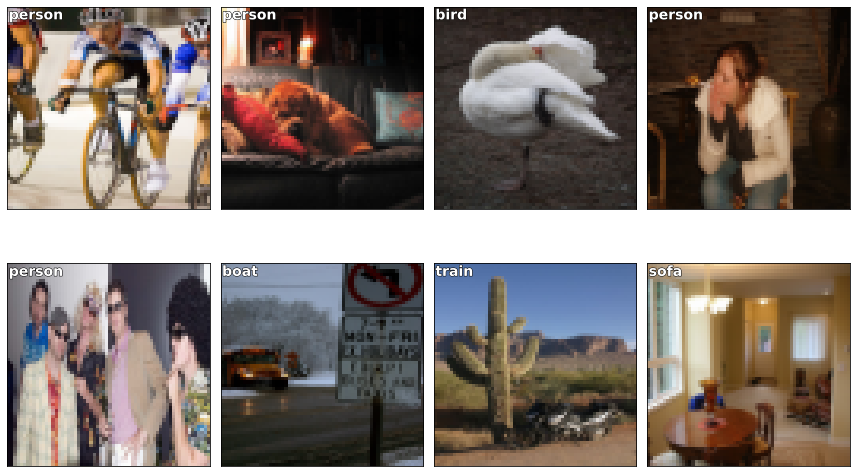

In [50]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(x)[i]
    b = md.classes[preds[i]]
    ax = show_img(ima, ax=ax)
    draw_text(ax, (0,0), b)
plt.tight_layout()

## Bbox only

In [51]:
BB_CSV = PATH/'tmp/bb.csv'

In [52]:
bb = np.array([trn_lrg_anno[o][0] for o in trn_ids])
bbs = [' '.join(str(p) for p in o) for o in bb]

df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids], 'bbox': bbs}, columns=['fn','bbox'])
df.to_csv(BB_CSV, index=False)

In [53]:
BB_CSV.open().readlines()[:5]

['fn,bbox\n',
 '000012.jpg,96 155 269 350\n',
 '000017.jpg,77 89 335 402\n',
 '000023.jpg,1 2 461 242\n',
 '000026.jpg,124 89 211 336\n']

In [55]:
f_model=resnet34
sz=64
bs=64

In [57]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD)
# {tfm_y=TfmType.COORD} means when we are doing resizing(scaling) , and data augmentation 
#it means take care for bounding boxes 
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True)

In [80]:
x,y=next(iter(md.val_dl))

In [101]:
ima=md.val_ds.denorm(to_np(x))[4]
b = bb_hw(to_np(y[4]));b

array([29.,  5., 22., 58.])

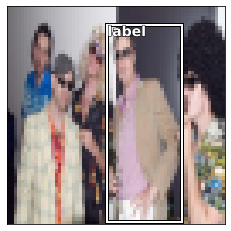

In [102]:
ax = show_img(ima)
draw_rect(ax, b)
draw_text(ax,b[:2],"label")

In [104]:
head_reg4 = nn.Sequential(Flatten(), nn.Linear(2048,4))
learn = ConvLearner.pretrained(f_model, md, custom_head=head_reg4)
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()

In [67]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 64, 64]),
                           ('output_shape', [-1, 64, 32, 32]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 32, 32]),
                           ('output_shape', [-1, 64, 32, 32]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 32, 32]),
                           ('output_shape', [-1, 64, 32, 32]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 32, 32]),
                           ('output_shape', [-1, 64, 16, 16]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 16, 16]),
        

 84%|████████████████████████████████████████████████████████████▊           | 27/32 [00:56<00:09,  1.87s/it, loss=105]

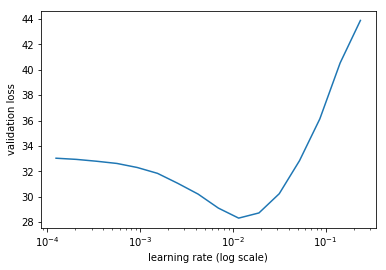

In [68]:
learn.lr_find(1e-5,100)
learn.sched.plot(5)

In [69]:
lr = 2e-3

In [70]:
learn.fit(lr, 1, cycle_len=1)

epoch      trn_loss   val_loss                                                                                         
    0      15.984888  12.719342 


[array([12.71934])]

In [71]:
learn.save('reg4')

In [72]:
learn.load('reg4')

In [73]:
x,y = next(iter(md.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

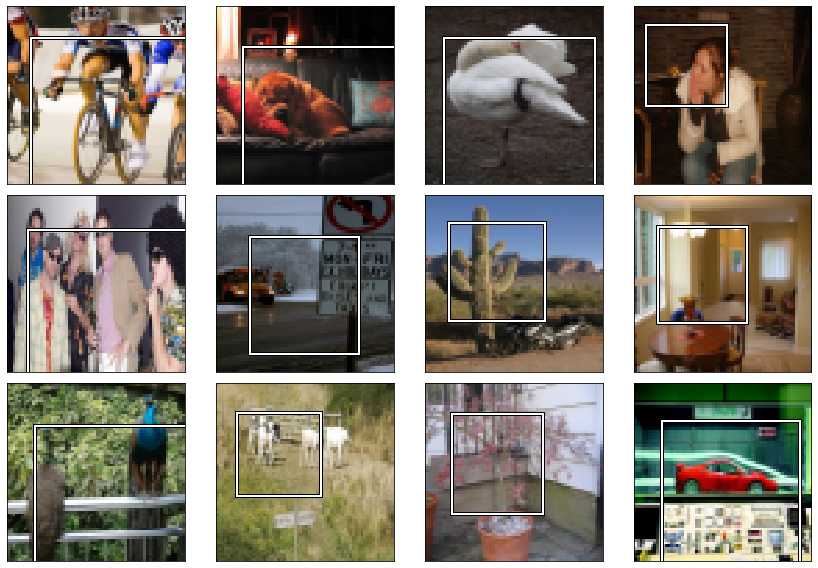

In [74]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(to_np(x))[i]
    b = bb_hw(preds[i])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
plt.tight_layout()

# using data augmentation 

### when we use use hight numbers for rotation , BoundingBoxes can't be handeled properly and considerd to be much larger windows

In [112]:
augs = [RandomRotate(90, tfm_y=TfmType.COORD),
        RandomRotate(30, tfm_y=TfmType.COORD),
        RandomLighting(0.1,0.1, tfm_y=TfmType.COORD)]
#RandomFlip(tfm_y=TfmType.COORD),

In [113]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

[11.  8. 46. 54.]
[ 2.  0. 51. 63.]
[ 4.  0. 54. 63.]
[ 4.  2. 48. 60.]
[13.  8. 33. 55.]
[ 1.  0. 55. 63.]
[ 8.  3. 48. 60.]
[ 7.  6. 42. 47.]
[ 2.  1. 51. 61.]


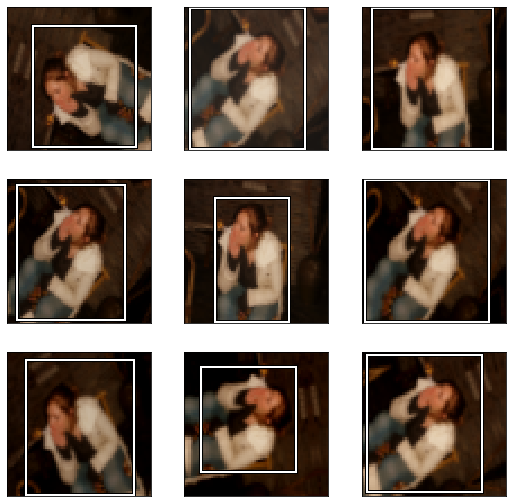

In [114]:
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [115]:
tfm_y = TfmType.COORD
augs = [RandomFlip(tfm_y=tfm_y),
        RandomRotate(3, p=0.5, tfm_y=tfm_y),
        RandomLighting(0.05,0.05, tfm_y=tfm_y)]

tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=tfm_y, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, bs=bs, continuous=True)

[19. 10. 30. 52.]
[19. 11. 29. 50.]
[16. 11. 28. 50.]
[15. 10. 30. 52.]
[19. 11. 30. 51.]
[15. 10. 30. 52.]
[16. 11. 28. 50.]
[19. 11. 29. 50.]
[19. 11. 29. 50.]


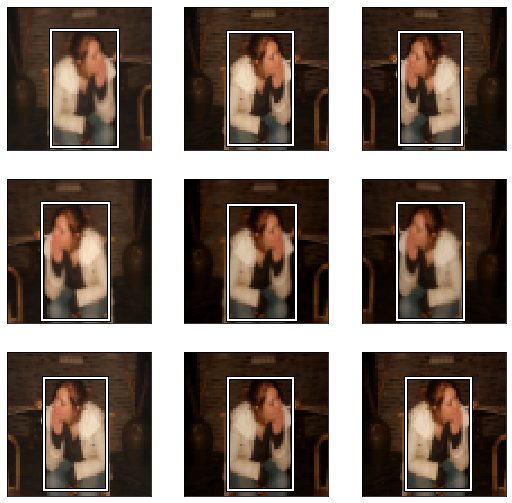

In [116]:
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [128]:
head_reg4 = nn.Sequential(Flatten(), nn.Linear(2048,4))
learn = ConvLearner.pretrained(f_model, md, custom_head=head_reg4)
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()

In [129]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 64, 64]),
                           ('output_shape', [-1, 64, 32, 32]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 32, 32]),
                           ('output_shape', [-1, 64, 32, 32]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 32, 32]),
                           ('output_shape', [-1, 64, 32, 32]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 32, 32]),
                           ('output_shape', [-1, 64, 16, 16]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 16, 16]),
        

 84%|███████████████████████████████████████████████████████████▉           | 27/32 [00:56<00:08,  1.80s/it, loss=89.9]

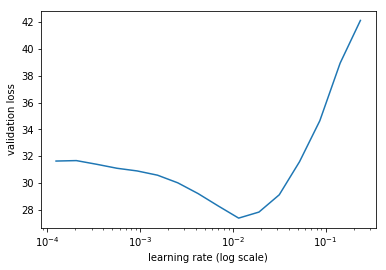

In [130]:
learn.lr_find(1e-5,100)
learn.sched.plot(5)

In [131]:
lr = 2e-3

In [132]:
learn.fit(lr, 1, cycle_len=1)

epoch      trn_loss   val_loss                                                                                         
    0      15.802559  12.561528 


[array([12.56153])]

In [133]:
learn.save('aug_reg4')

In [134]:
learn.load('aug_reg4')

# Single object detection

In [152]:
f_model=resnet34
sz=64
bs=64

val_idxs = get_cv_idxs(len(trn_fns))

In [204]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms,
   bs=bs, continuous=True, val_idxs=val_idxs)

In [205]:
md2 = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms_from_model(f_model, sz))

In [206]:
class ConcatLblDataset(Dataset):
    def __init__(self, ds, y2): self.ds,self.y2 = ds,y2
    def __len__(self): return len(self.ds)
    
    def __getitem__(self, i):
        x,y = self.ds[i]
        return (x, (y,self.y2[i]))

In [207]:
trn_ds2 = ConcatLblDataset(md.trn_ds, md2.trn_y)
val_ds2 = ConcatLblDataset(md.val_ds, md2.val_y)

In [208]:
md2.trn_y

array([ 6, 12, 14, ..., 16, 14,  6], dtype=int64)

In [209]:
trn_ds2[0][1]

(array([18., 20., 49., 43.], dtype=float32), 6)

In [217]:
x,y = md2.trn_ds[1]

In [218]:
y

12

In [216]:
md.trn_y[1]

array([ 77.,  89., 335., 402.], dtype=float32)

In [199]:
val_ds2[0][1]

(array([ 0., 14., 58., 50.], dtype=float32), 14)

In [200]:
md.trn_dl.dataset = trn_ds2
md.val_dl.dataset = val_ds2

In [201]:
x,y=next(iter(md.val_dl))

In [202]:
y[1]


 14
 17
  2
 14
 14
  5
 13
 10
  2
  9
 15
  6
  8
  7
 12
  0
 14
 14
  7
 19
  1
 14
 14
 13
 14
 14
 14
  5
  9
 18
 13
  0
  2
  6
 18
 11
 14
  3
  0
 10
  6
 13
 12
 14
  3
 13
 14
  7
 12
 13
  9
 14
  1
  2
 14
 11
  6
  0
  2
  2
  2
 17
 14
  9
[torch.LongTensor of size 64]

In [161]:
type(y[0])

torch.FloatTensor

In [162]:
x,y=next(iter(md.val_dl))
idx=3
ima=md.val_ds.ds.denorm(to_np(x))[idx]
b = bb_hw(to_np(y[0][idx])); b

array([16., 11., 30., 52.])

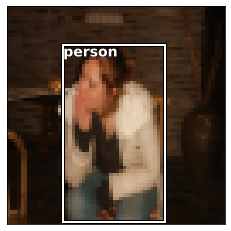

In [163]:
ax = show_img(ima)
draw_rect(ax, b)
draw_text(ax, b[:2], md2.classes[y[1][idx]])

In [174]:
head_reg4 = nn.Sequential(
    Flatten(),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(2048,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256,4+len(cats)),
)
models = ConvnetBuilder(f_model, 0, 0, 0, custom_head=head_reg4)

learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam

In [175]:
224/64

3.5

In [189]:
def detn_loss(input, target):
    bb_t,c_t = target
    bb_i,c_i = input[:, :4], input[:, 4:]
    bb_i = F.sigmoid(bb_i)*64    
    return F.l1_loss(bb_i, bb_t) + F.cross_entropy(c_i, c_t)*(20/3.5)
    #I looked at these quantities separately first then picked a multiplier
    #   to make them approximately equal

def detn_l1(input, target):
    bb_t,_ = target
    bb_i = input[:, :4]
    bb_i = F.sigmoid(bb_i)*64
    return F.l1_loss(V(bb_i),V(bb_t)).data

def detn_acc(input, target):
    _,c_t = target
    c_i = input[:, 4:]
    return accuracy(c_i, c_t)

learn.crit = detn_loss
learn.metrics = [detn_acc, detn_l1]

epoch      trn_loss   val_loss   detn_acc   detn_l1                                                                    
    0      53.064339  591.101801 0.062      29.477938 


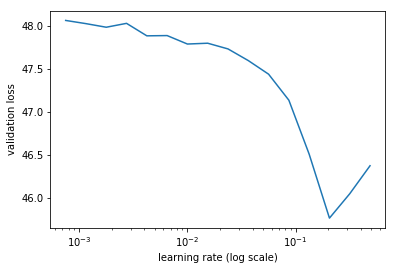

In [190]:
learn.lr_find()
learn.sched.plot()

In [191]:
lr=1e-2

In [192]:
learn.fit(lr, 1, cycle_len=1)

epoch      trn_loss   val_loss   detn_acc   detn_l1                                                                    
    0      43.487802  41.816479  0.492      29.495774 


[array([41.81648]), 0.492, 29.495774261474608]